# Random Forest Classification

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex

In [3]:
df=pd.read_csv("Travel.csv")

In [5]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [6]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [ ]:
df['Gender'].value_counts()
df['Gender']=df['Gender'].replace('Fe Male','Female')

In [11]:
df['MaritalStatus'].value_counts()   # Single and Unmarried are same so replace one of them
df['MaritalStatus'] = df['MaritalStatus'].replace('Single','Unmarried')

In [12]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [13]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [15]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [18]:
# check missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
features_with_na

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [21]:
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5),' : % missing values')

Age 4.62357  : % missing values
TypeofContact 0.51146  : % missing values
DurationOfPitch 5.13502  : % missing values
NumberOfFollowups 0.92062  : % missing values
PreferredPropertyStar 0.53191  : % missing values
NumberOfTrips 2.86416  : % missing values
NumberOfChildrenVisiting 1.35025  : % missing values
MonthlyIncome 4.76678  : % missing values


In [22]:
#Statistics on numerical null value columns
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [24]:
#Age
df.Age.fillna(df.Age.median(),inplace=True)
#Type of Contact
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)
#Duration of Pitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)
#NumberOfFollowups 
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace=True)
#PreferredPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)
#NumberOfTrips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)
#NumberOfChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)
#MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)

/var/folders/fg/nfbyqsn97g9by506c4_z8qjw0000gn/T/ipykernel_5329/2273611595.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(df.Age.median(),inplace=True)
/var/folders/fg/nfbyqsn97g9by506c4_z8qjw0000gn/T/ipykernel_5329/2273611595.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [25]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [26]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [27]:
#No use of customer id
df.drop('CustomerID',inplace=True,axis=1)

In [29]:
#Create new column for feature
df['TotalVisiting']=df['NumberOfPersonVisiting']+df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'],axis=1,inplace=True)

In [30]:
#get all numeric features 
num_features=[feature for feature in df.columns if df[feature].dtype!='O']
print('Number of numerical features :',len(num_features))

Number of numerical features : 12


In [31]:
#get all categorical features 
cat_features=[feature for feature in df.columns if df[feature].dtype=='O']
print('Number of categorical features :',len(cat_features))

Number of categorical features : 6


In [35]:
#get all discrete features 
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Number of discrete features :',len(discrete_features))

Number of discrete features : 9


In [36]:
#get all continuous features 
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Number of continuous features :',len(continuous_features))

Number of continuous features : 3


In [37]:
#Train test split
from sklearn.model_selection import train_test_split
X=df.drop(['ProdTaken'],axis=1)
y=df['ProdTaken']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((3910, 17), (978, 17))

In [39]:
#Create column Transformer with 3 types of transformer
cat_features=X.select_dtypes(include="object").columns
num_features=X.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder(drop='first')

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [40]:
#Train
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score, recall_score, precision_score

In [52]:
models={
    "Random Forest":RandomForestClassifier()
}
for i in range (len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    #performance metrics
    #Train
    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred)
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_roc_auc_curve=roc_auc_score(y_train,y_train_pred)

    #Test
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred)
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_roc_auc_curve=roc_auc_score(y_test,y_test_pred)

    print(list(models.keys())[i])
    print("\n")
    print("Model Performance of training dataset")
    print("_Accuracy:{:.4f}".format(model_train_accuracy))
    print("_F1-score:{:.4f}".format(model_train_f1))
    print("_Precision:{:.4f}".format(model_train_precision))
    print("_Recall:{:.4f}".format(model_train_recall))
    print("_Roc_auc_curve:{:.4f}".format(model_train_roc_auc_curve))

    print('--------------------------------------')

    print("\nModel Performance of testing dataset")

    print("_Accuracy:{:.4f}".format(model_test_accuracy))
    print("_F1-score:{:.4f}".format(model_test_f1))
    print("_Precision:{:.4f}".format(model_test_precision))
    print("_Recall:{:.4f}".format(model_test_recall))
    print("_Roc_auc_curve:{:.4f}".format(model_test_roc_auc_curve))




Random Forest


Model Performance of training dataset
_Accuracy:1.0000
_F1-score:1.0000
_Precision:1.0000
_Recall:1.0000
_Roc_auc_curve:1.0000
--------------------------------------

Model Performance of testing dataset
_Accuracy:0.9305
_F1-score:0.7875
_Precision:0.9767
_Recall:0.6597
_Roc_auc_curve:0.8279


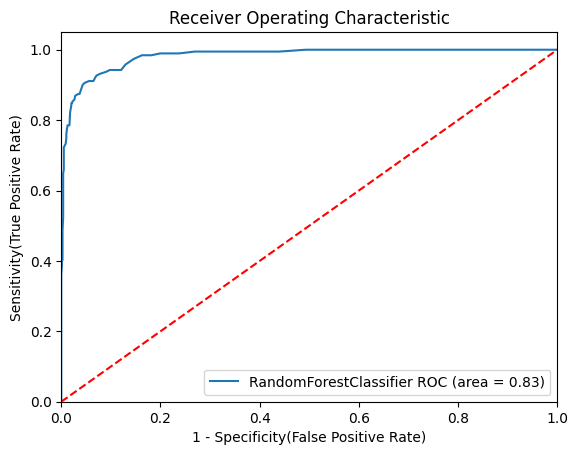

In [54]:
#Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

#Add the models to the list that you want to view on the ROC plot 
auc_models = [
    {
        'label':'RandomForestClassifier',
        'model': RandomForestClassifier(),
        'auc':0.8319
    },
]

#Create loop through all the models
for algo in auc_models:
    model = algo['model']
    model.fit(X_train,y_train)

    #compute the false positive rate and true positive rate
    fpr,tpr,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])

    #calculate the area under the curve
    plt.plot(fpr,tpr,label='%s ROC (area = %0.2f)' % (algo['label'],algo['auc']))

    #custom setting of the plot
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('1 - Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.savefig("auc_non_hyper.png")
    plt.show()


In [45]:
#Hyperparameter tuning
rf_params = {
    "max_depth":[5,8,15,None,10],
    "max_features":[5,7,"auto",8],
    "min_samples_split":[2,8,15,20],
    "n_estimators":[100,200,500,1000]
}

In [47]:
#Models list for Hyperparameter Tuning
randomcv_models = [
    ("RF",RandomForestClassifier(), rf_params),
]

In [49]:
from sklearn.model_selection import RandomizedSearchCV

model_param={}
for name,model,params in randomcv_models:
    random=RandomizedSearchCV(estimator=model,
                              param_distributions=params,
                              n_iter=100,
                              cv=3,
                              verbose=2,
                              n_jobs=-1)
    random.fit(X_train,y_train)
    model_param[name]=random.best_params_

for model_name in model_param:
    print(f"-------------------Best Params for {model_name}-------------------")
    print(model_param[model_name])


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=15, max_features=auto, min_samples_split=15, n_estimators=500; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_split=15, n_estimators=500; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_split=15, n_estimators=500; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_split=20, n_estimators=1000; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_split=20, n_estimators=1000; total time=   0.0s
[CV] END max_depth=8, max_features=auto, min_samples_split=20, n_estimators=1000; total time=   0.0s
[CV] END max_depth=5, max_features=5, min_samples_split=15, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, max_features=5, min_samples_split=15, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, max_features=5, min_samples_split=15, n_estimators=200; total time=   0.4s
[CV] END max_depth=8, max_features=7, mi

/Users/sayantanmandal/Advance_Machine_Learning/venv1/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
90 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
52 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sayantanmandal/Advance_Machine_Learning/venv1/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sayantanmandal/Advance_Machine_Learning/venv1/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/sayantanmandal/Advance_Machine_Learning/venv1/lib/pyt

-------------------Best Params for RF-------------------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 7, 'max_depth': 15}


In [50]:
models={
    "Random Forest":RandomForestClassifier(n_estimators=500,min_samples_split=2,max_features=7,max_depth=15)
}
for i in range (len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    #performance metrics
    #Train
    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred)
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_roc_auc_curve=roc_auc_score(y_train,y_train_pred)

    #Test
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred)
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_roc_auc_curve=roc_auc_score(y_test,y_test_pred)

    print(list(models.keys())[i])
    print("\n")
    print("Model Performance of training dataset")
    print("_Accuracy:{:.4f}".format(model_train_accuracy))
    print("_F1-score:{:.4f}".format(model_train_f1))
    print("_Precision:{:.4f}".format(model_train_precision))
    print("_Recall:{:.4f}".format(model_train_recall))
    print("_Roc_auc_curve:{:.4f}".format(model_train_roc_auc_curve))

    print('--------------------------------------')

    print("\nModel Performance of testing dataset")

    print("_Accuracy:{:.4f}".format(model_test_accuracy))
    print("_F1-score:{:.4f}".format(model_test_f1))
    print("_Precision:{:.4f}".format(model_test_precision))
    print("_Recall:{:.4f}".format(model_test_recall))
    print("_Roc_auc_curve:{:.4f}".format(model_test_roc_auc_curve))




Random Forest


Model Performance of training dataset
_Accuracy:0.9995
_F1-score:0.9986
_Precision:1.0000
_Recall:0.9973
_Roc_auc_curve:0.9986
--------------------------------------

Model Performance of testing dataset
_Accuracy:0.9294
_F1-score:0.7864
_Precision:0.9621
_Recall:0.6649
_Roc_auc_curve:0.8293


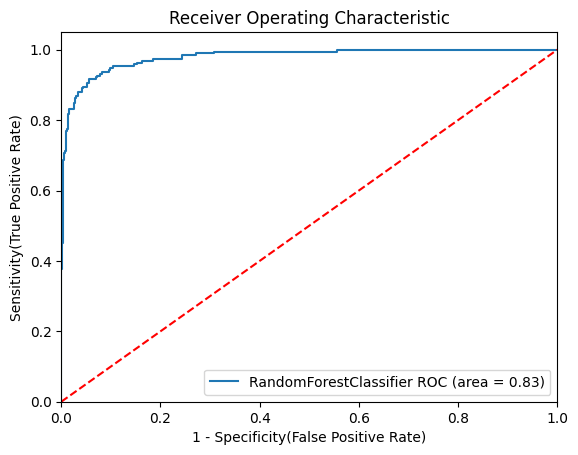

In [55]:
#Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

#Add the models to the list that you want to view on the ROC plot 
auc_models = [
    {
        'label':'RandomForestClassifier',
        'model': RandomForestClassifier(n_estimators=500,min_samples_split=2,max_features=7,max_depth=15),
        'auc':0.8319
    },
]

#Create loop through all the models
for algo in auc_models:
    model = algo['model']
    model.fit(X_train,y_train)

    #compute the false positive rate and true positive rate
    fpr,tpr,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])

    #calculate the area under the curve
    plt.plot(fpr,tpr,label='%s ROC (area = %0.2f)' % (algo['label'],algo['auc']))

    #custom setting of the plot
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('1 - Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.savefig("auc_with_param.png")
    plt.show()
